<a href="https://colab.research.google.com/github/cool60334/Team_Project_Model/blob/main/Model_1108.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

台北市房屋交易_1110_2.csv 在github


In [2]:
# 讀取csv檔案
f = pd.read_csv("台北市房屋交易_1110_2_正規化.csv", encoding = "utf-8")
pd.set_option('display.max_columns', 200)  # 增加顯示的列數

In [3]:
f.head()

,totalm2,tradef,totalf,totalbm2,room,hall,health,sep,org,tp,unitp,parkm2,parkp,mainbm2,auxbm2,balm2,ele,建物,房地(土地+建物),房地(土地+建物)+車位,住,其他都市土地使用分區,商,住商用,住家用,其他主要用途,商業用,工業用,辦公用,磚造,鋼筋混凝土造,鋼骨造,其他車位類別,坡道平面,機械車位,無車位,age,住宅大樓(11層含以上有電梯),公寓(5樓含以下無電梯),華廈(10層含以下有電梯),透天厝,year_average_cpi,year_increase_cpi,med,park_d,park_q,mu_d,mu_q,lib_d,lib_q,mrt_d,mrt_q,edu_d,edu_q,fire_d,fire_q,dead_d,dead_q,pol_d,pol_q,post_d,post_q,hosp_d,hosp_q,fin_d,fin_q
0,0.689639,6,11,2.196536,0,0,0,0,1,2.414124,178307,2.983514,3.149126,0.984512,0.662454,-1.069258,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,15,1,0,0,0,107.12,0.0,0.216938,1,15,1,0,1,1,1,4,1,5,1,0,1,0,1,2,1,3,1,92,1,49
1,0.078852,2,5,-0.127611,3,2,2,1,0,-0.637805,102820,-0.398459,-0.334222,0.054407,-0.300273,0.935205,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,45,0,1,0,0,107.12,0.0,-0.698069,1,33,1,0,1,2,1,4,1,10,1,1,1,0,1,4,1,3,1,100,1,15
2,0.057990,3,4,-0.306758,2,1,1,1,0,-0.167940,291409,-0.398459,-0.334222,-0.072108,-0.300273,-1.069258,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,53,0,1,0,0,107.12,0.0,1.732845,1,15,1,1,1,3,1,22,1,9,1,1,1,0,1,4,1,8,1,167,1,59
3,0.095078,3,4,-0.293217,3,1,2,1,0,-0.769543,100040,-0.398459,-0.334222,-0.125819,-0.300273,0.465764,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,41,0,1,0,0,107.12,0.0,-0.684412,1,13,1,0,1,1,1,0,1,4,1,0,1,0,1,1,1,2,1,70,1,6
4,-0.491370,100,3,-0.676030,3,3,3,1,0,-0.923237,327600,-0.398459,-0.334222,-0.521931,-0.300273,-1.069258,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,28,0,0,0,1,107.12,0.0,-1.271655,1,23,1,2,1,3,1,25,1,14,1,4,1,0,1,10,1,8,1,207,1,86


In [ ]:
# 去除非數值欄位(鄉鎮市區、地址、交易年月日、建築完成年月、交易年分、建築年分、緯度、經度)
# 去除已轉換成one-hot欄位(交易標的、土地使用分區、建築型態、主要用途、主要建材、車位類別)

# f = f.drop(["dis", "sign", "add", "zone", "tradeymd", "state", "mainuse", "mater", "comy", "parkcat", "tradeyr", "buildyr", "lat", "lng"], axis=1)

In [4]:
from sklearn.model_selection import train_test_split 

In [5]:
import numpy as np

In [ ]:
# 將土地移轉總面積平方公尺 標準化
f["totalm2"] = (f["totalm2"] - f["totalm2"].mean())/\
            (f["totalm2"].std())

In [ ]:
# 將建物移轉總面積平方公尺 標準化
f["totalbm2"] = (f["totalbm2"] - f["totalbm2"].mean())/\
            (f["totalbm2"].std()) 

In [ ]:
# 總價 標準化
f["tp"] = (f["tp"] - f["tp"].mean())/\
            (f["tp"].std())

In [ ]:
# 將車位移轉總面積(平方公尺) 標準化
f["parkm2"] = (f["parkm2"] - f["parkm2"].mean())/\
            (f["parkm2"].std())

In [ ]:
# 將車位總價元 標準化
f["parkp"] = (f["parkp"] - f["parkp"].mean())/\
            (f["parkp"].std())

In [ ]:
# 將主建物面積 標準化
f["mainbm2"] = (f["mainbm2"] - f["mainbm2"].mean())/\
            (f["mainbm2"].std())

In [ ]:
# 將附屬建物面積 標準化
f["auxbm2"] = (f["auxbm2"] - f["auxbm2"].mean())/\
            (f["auxbm2"].std())

In [ ]:
# 將陽台面積 標準化
f["balm2"] = (f["balm2"] - f["balm2"].mean())/\
            (f["balm2"].std())

In [ ]:
# 將所得中位數 標準化
f["med"] = (f["med"] - f["med"].mean())/\
            (f["med"].std())

In [ ]:
# f.head()
# f = f.drop(["year_average_cpi", "year_increase_cpi", "med", "park_d", "park_q", "mu_d", "mu_q", "lib_d", "lib_q", "mrt_d", "mrt_q", 
#         "edu_d", "edu_q", "fire_d", "fire_q", "dead_d", "dead_q", "pol_d", "pol_q", "post_d", "post_q", "hosp_d", "hosp_q",
#             "fin_d", "fin_q"], axis=1)

In [8]:
# 特徵(去除總價元、單價元平方公尺、車位總價元)

x = np.array(f.drop(["tp","unitp","parkp"], axis = 1))

In [9]:
# 目標(取得總價元)

y = np.array(f["tp"])

In [ ]:
# 切分資料(特徵90%，特徵10%，目標90%，目標10%)

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

#### 以迴圈跑5~12層決策樹各30次

In [15]:
df = pd.DataFrame(columns =["d5", "d6", "d7", "d8", "d9", "d10", "d11"])

In [17]:


from sklearn.tree import DecisionTreeRegressor

for d in range(5,12):
  
  s_list=[]
  i = 0
  for i in range(0, 30):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
    
    # 建立迴歸決策樹
    reg = DecisionTreeRegressor(max_depth=d)

    # 訓練迴歸決策樹
    reg.fit(x_train, y_train)

    from sklearn.metrics import r2_score

    # 將測試用特徵帶入模型做預測
    pre = reg.predict(x_test)

    # 預測準確度
    s = r2_score(y_test, pre)
    i = i + 1
    s_list.append(s)

  df["d" + str(d)] = s_list


In [18]:
df

,d5,d6,d7,d8,d9,d10,d11
0,0.568515,0.780949,0.833010,0.565250,0.740723,0.333233,-1.500555
1,-2.311340,0.337752,0.356497,0.791850,0.231426,-0.538504,0.594845
2,0.320358,0.588700,0.343769,0.282032,0.679071,-0.423899,0.206573
3,0.774304,0.379002,-0.090912,-0.655839,-0.537028,0.139495,0.693530
4,0.839688,0.315774,0.641925,0.769319,0.736078,0.405773,-1.000838
5,0.622177,-0.853339,0.379933,0.692487,0.166802,-0.218337,0.503834
6,0.716729,0.221036,-0.059447,0.334747,0.307076,0.811831,0.448159
7,0.478702,0.714070,0.443437,0.245249,0.820458,-0.095685,0.711676
8,0.667417,0.591671,0.633226,0.770796,0.687469,0.637573,-0.349652
9,0.731526,0.843277,0.328286,0.448455,0.663586,0.545978,0.479742


In [12]:
import statistics

In [19]:
mean_list = []
for i in range(5, 12):

  d_list = df["d" + str(i)].values.tolist()
  mean = statistics.mean(d_list)
  mean_list.append(mean)

In [20]:
# 訓練30次後，每層決策樹的平均r2_score

mean_list

[0.2737331648366609,
 0.40964415193311665,
 0.435860987117588,
 0.29339969446701974,
 0.319328535880154,
 0.3756158323045803,
 0.22129772246785157]

In [ ]:
# df.loc[5] = mean_list # 新增橫列

#### 跑單次決策樹

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [30]:
from sklearn.tree import DecisionTreeRegressor
# 建立迴歸決策樹
reg = DecisionTreeRegressor(max_depth=8)

# 訓練迴歸決策樹
reg.fit(x_train, y_train)

from sklearn.metrics import r2_score

# 將測試用特徵帶入模型做預測
pre = reg.predict(x_test)

# 預測準確度
r2_score(y_test, pre)

0.727743512549516

In [32]:
# from sklearn import feature_importances
reg.feature_importances_

array([3.95299706e-03, 1.16835110e-03, 2.84528872e-03, 6.98955369e-01,
       2.33040412e-04, 6.49945412e-04, 4.28524553e-05, 0.00000000e+00,
       0.00000000e+00, 2.17035083e-03, 1.60276202e-02, 3.73607902e-03,
       3.33757805e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.21547334e-03, 0.00000000e+00, 4.45300161e-04,
       0.00000000e+00, 1.01925019e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.17752184e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.22555664e-02, 0.00000000e+00, 1.54932837e-07,
       3.44936512e-05, 7.99694422e-03, 0.00000000e+00, 0.00000000e+00,
       1.58334992e-03, 0.00000000e+00, 1.94266689e-02, 0.00000000e+00,
       3.99266844e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.90209765e-02, 0.00000000e+00, 1.00352878e-02, 0.00000000e+00,
       3.36193951e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20303 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23478 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29992 missing from current font.
  font.set_text(s, 0.0, flags=flags)


[Text(0.5, 0.875, 'totalbm2 <= 0.438\nsquared_error = 0.923\nsamples = 406\nvalue = -0.004'),
 Text(0.25, 0.625, 'totalbm2 <= -0.078\nsquared_error = 0.261\nsamples = 347\nvalue = -0.248'),
 Text(0.125, 0.375, 'totalbm2 <= -0.391\nsquared_error = 0.107\nsamples = 239\nvalue = -0.463'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'hosp_q <= 354.5\nsquared_error = 0.272\nsamples = 108\nvalue = 0.227'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'totalbm2 <= 1.01\nsquared_error = 2.415\nsamples = 59\nvalue = 1.429'),
 Text(0.625, 0.375, 'park_q <= 10.0\nsquared_error = 0.438\nsamples = 47\nvalue = 0.947'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, '住家用 <= 0.5\nsquared_error = 5.683\nsamples = 12\nvalue = 3.317'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20303 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 23478 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 29992 missing from current font.
  font.set_text(s, 0, flags=flags)


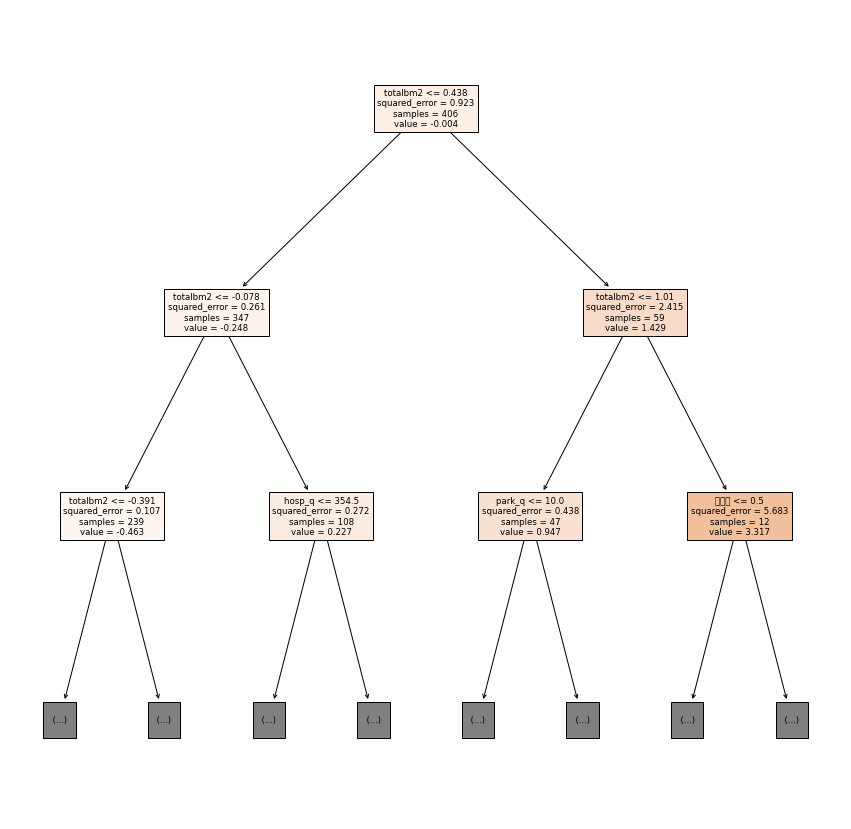

In [34]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 15))
plot_tree(reg, 
      feature_names=f.drop(["tp","unitp","parkp"], axis = 1).columns,
      filled=True,
      max_depth=2)

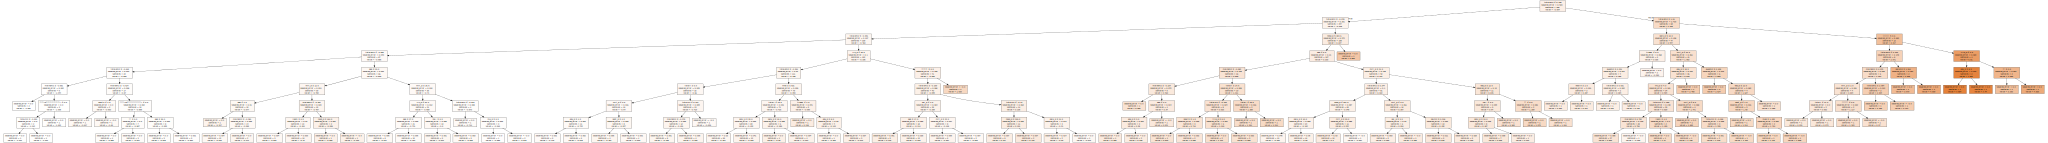

In [33]:
from sklearn.tree import export_graphviz
import graphviz

g = export_graphviz(reg, out_file=None, 
            feature_names=f.drop(["tp","unitp","parkp"], axis = 1).columns,     
            filled=True, special_characters=True)

graph = graphviz.Source(g)
graph

In [ ]:
f.to_csv("台北市房屋交易_1110_2_正規化.csv", encoding = "utf-8", index=False)